In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

remote_path = "https://raw.githubusercontent.com/wasit7/2020/master/tso/03_time_series/SampleData.csv"
df=pd.read_csv(remote_path)
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')
df = df.set_index('Date')
df.head(10)

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN
2010-06-15,38.0,NaN
2010-07-15,45.0,45.0
2010-08-15,43.0,43.0
2010-09-15,35.0,NaN


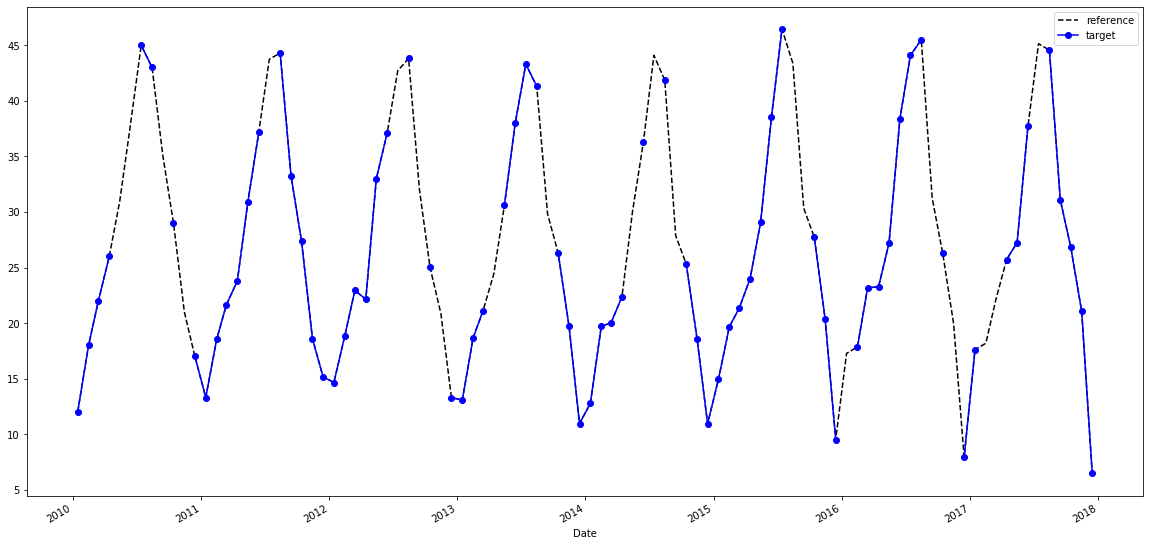

In [2]:
df.plot(style=['k--', 'bo-'], figsize=(20, 10));

![interpolate](https://gist.github.com/gyassine/b47b90e8de935cc06ef856401f7582b0/raw/3d067bbb5f1e1ad0b941bc568de44431ec8b64b4/interpolate_method.png)

In [3]:
#https://docs.scipy.org/doc/scipy/reference/interpolate.html
df['InterpolateLinear'] = df.target.interpolate(method='linear')
df['InterpolateQuadratic'] = df.target.interpolate(method='quadratic')
df['InterpolateAkima'] = df.target.interpolate(method='akima')

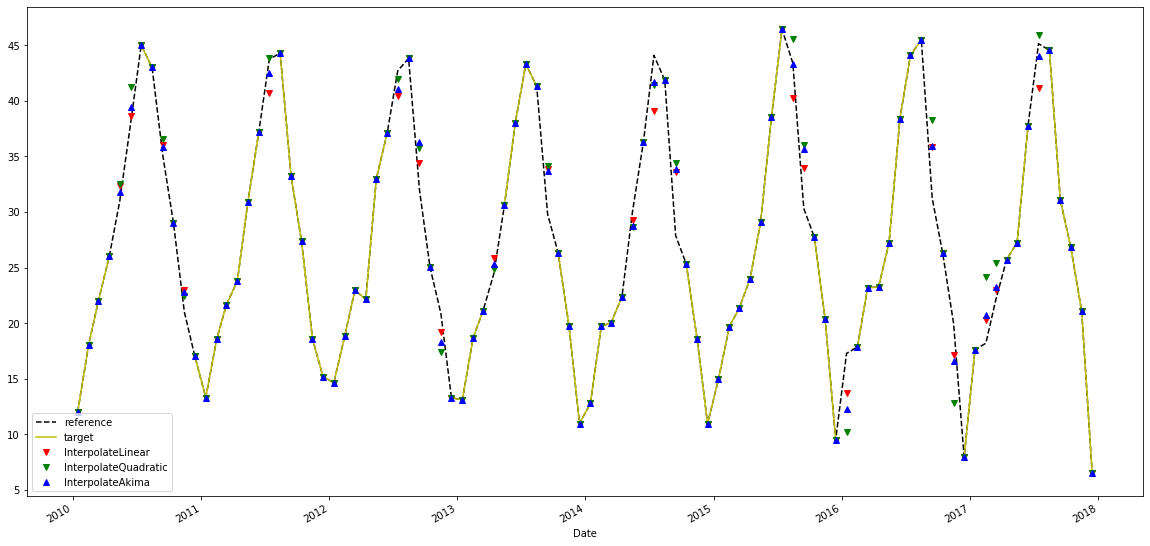

In [10]:
df.plot(style=['k--', 'y-','rv','gv','b^','m^'],figsize=(20, 10));

![r2_score](r2_score.png)

In [5]:
results = [(method, r2_score(df.reference, df[method])) for method in list(df)[2:]]
results

[('InterpolateLinear', 0.9813215759943529),
 ('InterpolateQuadratic', 0.9663474396797),
 ('InterpolateAkima', 0.981684100149588)]

In [6]:
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df.sort_values(by='R_squared', ascending=False)

,Method,R_squared
2,InterpolateAkima,0.981684100149588
0,InterpolateLinear,0.9813215759943529
1,InterpolateQuadratic,0.9663474396797


In [11]:
#https://docs.scipy.org/doc/scipy/reference/interpolate.html